# Creating and Backtesting SMA Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [ ]:
df["returns"] = np.log(df.div(df.shift(1)))

In [ ]:
df

In [14]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
import yfinance as yf
   
start1 = '2020-01-01'
end1='2021-03-01'
# looping over tickers and creating a dataframe with close prices
stocks = yf.download('AAPL',start1,end1,interval='1d')


[*********************100%***********************]  1 of 1 completed


## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

In [3]:
df =stocks.copy()

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [ ]:
df.returns.sum()

In [ ]:
np.exp(df.returns.sum())

In [ ]:
df.price[-1] / df.price[0]

In [ ]:
df.returns.cumsum().apply(np.exp)

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [ ]:
df

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [ ]:
df

In [ ]:
df.creturns.iloc[-1] # absolute Performance 

In [ ]:
df.returns.sum() # absolute Performance

In [ ]:
df.describe()

__annualized mean return and risk__

In [ ]:
df.returns.mean() * 252 # mean return

In [ ]:
df.returns.std() * np.sqrt(252) # risk

__maximum drawdown__

In [ ]:
df

In [ ]:
df["cummax"] = df.creturns.cummax()

In [ ]:
df

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

In [ ]:
drawdown.max() # maximum drawdown

In [ ]:
drawdown.idxmax()

## Defining an SMA Crossover Strategy

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [89]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
import yfinance as yf
   
start1 = '2018-01-01'
end1='2021-03-01'
# looping over tickers and creating a dataframe with close prices
stocks = yf.download('SPY',start1,end1,interval='1d')


[*********************100%***********************]  1 of 1 completed


In [90]:
data = stocks.copy()

In [58]:
data 

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   41.310070   
2018-01-03   43.132500   43.637501   42.990002   43.057499   41.302879   
2018-01-04   43.134998   43.367500   43.020000   43.257500   41.494736   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.967163   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.811283   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume  
Date                   
2018-01-02  102223600  
2018-01-03  118071600  
2018-01-04   89738400  
2018-01-05   94640000  
2018-01-08   82271200  
...               ...  
2021-02-22  103916400  
2021-02-23  158273000  
2021-02-24  111039900  
2021-02-25  148199500  
2021-02-26  164560400  

[794 rows x 6 columns]

In [91]:
sma_s = 50
sma_l = 200

In [92]:
data['price']=data['Close']

In [93]:
data1 = data['price']

In [94]:
data1 =pd.DataFrame(data1)

In [95]:
data1["SMA_S"] = data1.price.rolling(sma_s).mean()

In [96]:
data1["SMA_L"] = data1.price.rolling(sma_l).mean()

In [97]:
data1

price       SMA_S       SMA_L
Date                                          
2018-01-02  268.769989         NaN         NaN
2018-01-03  270.470001         NaN         NaN
2018-01-04  271.609985         NaN         NaN
2018-01-05  273.420013         NaN         NaN
2018-01-08  273.920013         NaN         NaN
...                ...         ...         ...
2021-02-22  387.029999  378.249401  342.204951
2021-02-23  387.500000  378.662401  342.704051
2021-02-24  391.769989  379.163200  343.200701
2021-02-25  382.329987  379.483800  343.649850
2021-02-26  380.359985  379.797800  344.118300

[794 rows x 3 columns]

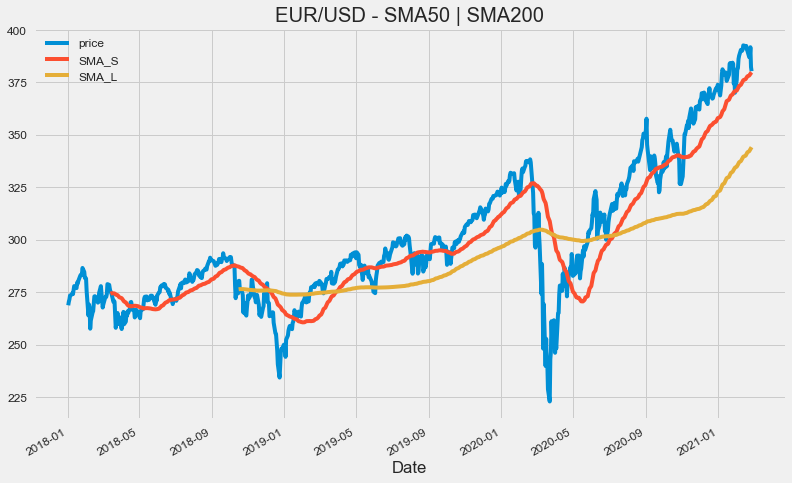

In [98]:
data1.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [99]:
data.dropna(inplace = True)

In [100]:
data = data1.copy()

In [103]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [104]:
data

price       SMA_S       SMA_L  position
Date                                                    
2018-01-02  268.769989         NaN         NaN        -1
2018-01-03  270.470001         NaN         NaN        -1
2018-01-04  271.609985         NaN         NaN        -1
2018-01-05  273.420013         NaN         NaN        -1
2018-01-08  273.920013         NaN         NaN        -1
...                ...         ...         ...       ...
2021-02-22  387.029999  378.249401  342.204951         1
2021-02-23  387.500000  378.662401  342.704051         1
2021-02-24  391.769989  379.163200  343.200701         1
2021-02-25  382.329987  379.483800  343.649850         1
2021-02-26  380.359985  379.797800  344.118300         1

[794 rows x 4 columns]

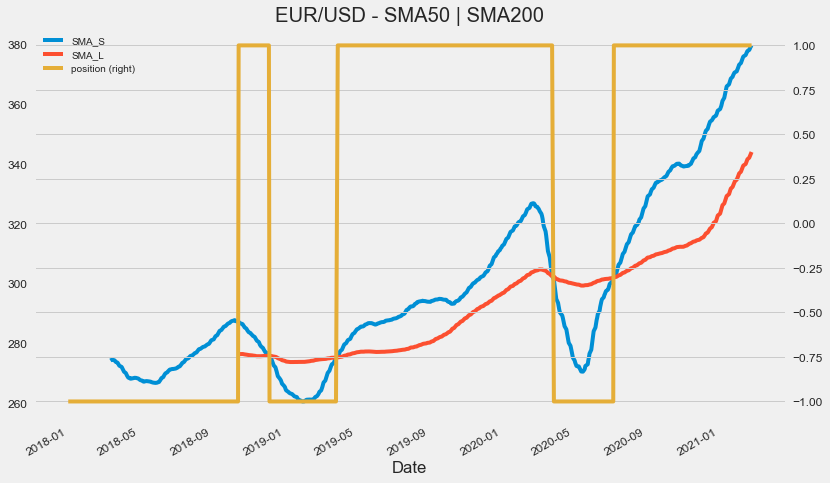

In [105]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [106]:
data

price       SMA_S       SMA_L  position
Date                                                    
2018-01-02  268.769989         NaN         NaN        -1
2018-01-03  270.470001         NaN         NaN        -1
2018-01-04  271.609985         NaN         NaN        -1
2018-01-05  273.420013         NaN         NaN        -1
2018-01-08  273.920013         NaN         NaN        -1
...                ...         ...         ...       ...
2021-02-22  387.029999  378.249401  342.204951         1
2021-02-23  387.500000  378.662401  342.704051         1
2021-02-24  391.769989  379.163200  343.200701         1
2021-02-25  382.329987  379.483800  343.649850         1
2021-02-26  380.359985  379.797800  344.118300         1

[794 rows x 4 columns]

In [107]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [108]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [76]:
data

price     SMA_S       SMA_L  position   returns  strategy
Date                                                                      
2018-01-02   43.064999       NaN         NaN        -1       NaN       NaN
2018-01-03   43.057499       NaN         NaN        -1 -0.000174  0.000174
2018-01-04   43.257500       NaN         NaN        -1  0.004634 -0.004634
2018-01-05   43.750000       NaN         NaN        -1  0.011321 -0.011321
2018-01-08   43.587502       NaN         NaN        -1 -0.003721  0.003721
...                ...       ...         ...       ...       ...       ...
2021-02-22  126.000000  131.8922  111.857400         1 -0.030252 -0.030252
2021-02-23  125.860001  131.9738  112.107025         1 -0.001112 -0.001112
2021-02-24  125.349998  132.0160  112.346112         1 -0.004060 -0.004060
2021-02-25  120.989998  131.9876  112.557300         1 -0.035402 -0.035402
2021-02-26  121.260002  131.9772  112.774337         1  0.002229  0.002229

[794 rows x 6 columns]

In [109]:
data.dropna(inplace = True)

In [110]:
data[["returns", "strategy"]].sum() # absolute performance

returns     0.326531
strategy   -0.246075
dtype: float64

In [79]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     2.231505
strategy    1.276821
dtype: float64

In [80]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns     0.339957
strategy    0.103499
dtype: float64

In [81]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.380096
strategy    0.380644
dtype: float64

In [82]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [83]:
data

price      SMA_S       SMA_L  position   returns  strategy  \
Date                                                                          
2018-10-16   55.537498   54.92185   47.399888         1  0.021798 -0.021798   
2018-10-17   55.297501   54.99225   47.461050         1 -0.004331 -0.004331   
2018-10-18   54.005001   55.03610   47.515788         1 -0.023651 -0.023651   
2018-10-19   54.827499   55.08825   47.573638         1  0.015115  0.015115   
2018-10-22   55.162498   55.15385   47.630700         1  0.006091  0.006091   
...                ...        ...         ...       ...       ...       ...   
2021-02-22  126.000000  131.89220  111.857400         1 -0.030252 -0.030252   
2021-02-23  125.860001  131.97380  112.107025         1 -0.001112 -0.001112   
2021-02-24  125.349998  132.01600  112.346112         1 -0.004060 -0.004060   
2021-02-25  120.989998  131.98760  112.557300         1 -0.035402 -0.035402   
2021-02-26  121.260002  131.97720  112.774337         1  0.002229  0.002229   

            creturns  cstrategy  
Date                             
2018-10-16  1.022037   0.978438  
2018-10-17  1.017621   0.974210  
2018-10-18  0.993835   0.951439  
2018-10-19  1.008971   0.965930  
2018-10-22  1.015136   0.971831  
...              ...        ...  
2021-02-22  2.318734   1.326731  
2021-02-23  2.316158   1.325257  
2021-02-24  2.306772   1.319887  
2021-02-25  2.226537   1.273978  
2021-02-26  2.231505   1.276821  

[595 rows x 8 columns]

In [ ]:
plt.plot(1+data['returns'])

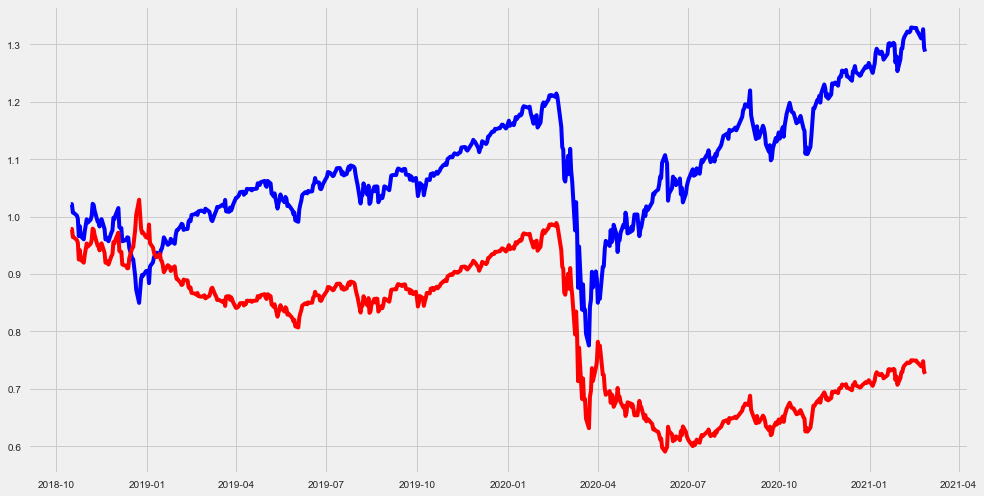

In [111]:
fig, ax = plt.subplots()
plt.plot((1+data['returns']).cumprod(), color = 'blue')
plt.plot((1+data['strategy']).cumprod(), color = 'red')

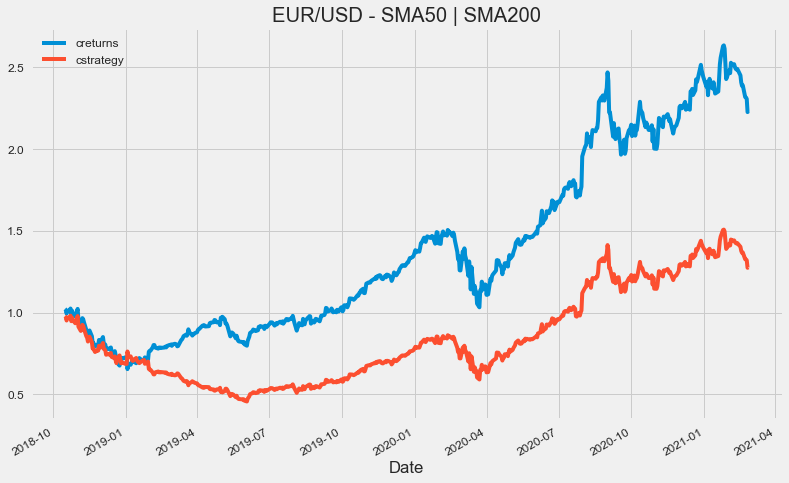

In [84]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

## Finding the optimal SMA Strategy

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [ ]:
run_strategy((50, 200))

In [ ]:
run_strategy((10, 50))

In [ ]:
run_strategy((22, 252))

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

In [ ]:
-run_strategy((46, 137))

## Trades and Transaction Costs (Part 1)

In [ ]:
data # sma 50/200 strategy

In [ ]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.position.diff().fillna(0).abs()

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data

In [ ]:
data.trades.value_counts()

## Trades and Trading Costs (Part 2)

(simplified approximation for vectorized backtesting)

In [ ]:
spread = 1.5 * 0.0001 # pips == Fourth price decimal
commissions = 0

In [ ]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread * 100000

In [ ]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc

In [ ]:
ptc = 0.00007

In [ ]:
data

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()